# Foundations of AI & ML
## Session 06
### Experiment 3 - Part 3
### Applying LLE on Swiss roll data

#### we will be generating the Swiss roll data as we have done in part 0

In [1]:
### importing the required packages
from sklearn.datasets import *
from sklearn import manifold
import matplotlib.pyplot as plt

#### Generating the data

In [2]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

#### Applying LLE on data

In [3]:

lle_data, _ = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

In [4]:
type(lle_data)

numpy.ndarray

In [5]:
lle_data.shape

(1500, 2)

#### Plotting the data

<IPython.core.display.Javascript object>


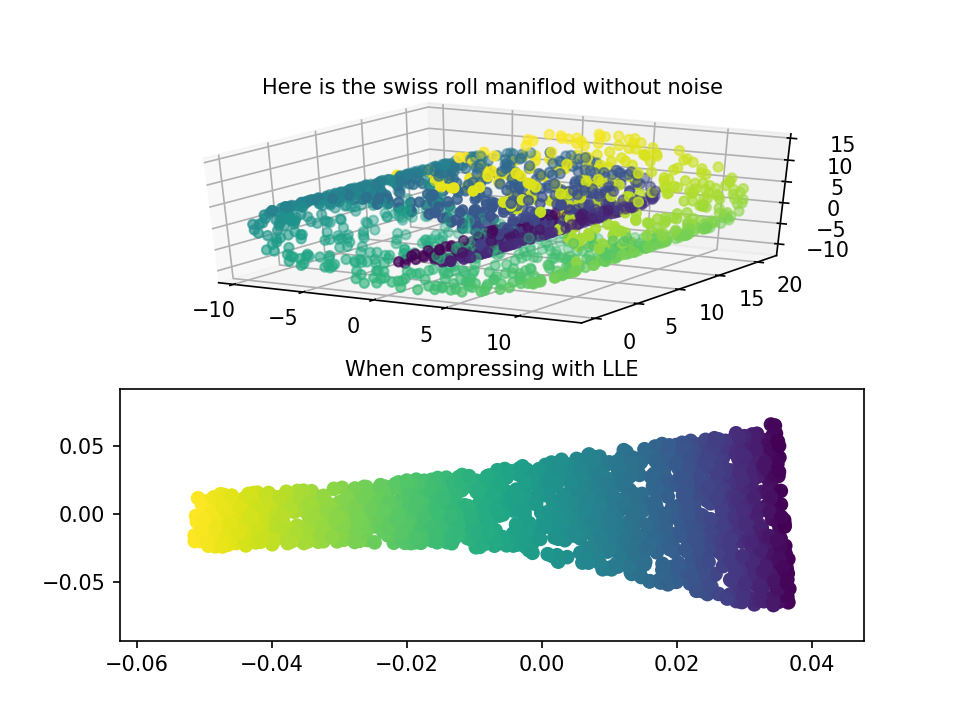

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod without noise', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with LLE', fontsize=10)
ax.scatter(lle_data[:,0],lle_data[:,1],c = color)
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [7]:
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

In [8]:
ndata.shape

(300, 3)

#### Lets concatenate the noise data values and original data values

In [9]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [10]:
con_data.shape

(1800, 3)

In [11]:
###Let us apply lle on the data
lle_hdata, _ = manifold.locally_linear_embedding(con_data, n_neighbors=12,
                                             n_components=2)

#### Let us plot the data

<IPython.core.display.Javascript object>


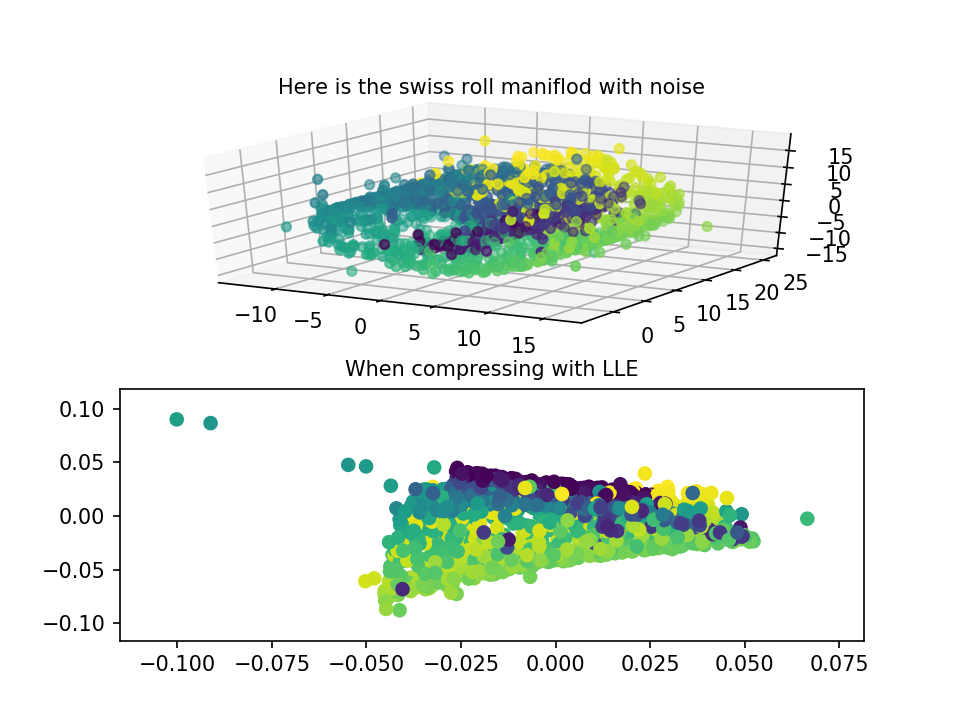

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with LLE', fontsize=10)
ax.scatter(lle_hdata[:,0],lle_hdata[:,1],c = con_colors)


**Summary:** Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analysis which are globally compared to find the best non-linear embedding.